# Projeto Computacional

## Q. 3 -
### a) Elabore um programa que gere um diagrama de bifurcação (semelhante ao mapa logístico) para o mapa: x_n+1 = r*sin(pi*x_n), onde 0<=r<=q.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import turtle
from random import random

In [3]:
def bifurcacao_diagrama(num_values: int, r: float, x0: float) -> list:
    valores = []
    x = x0
    for i in range(num_values):
        x = r*np.sin(np.pi*x)
        valores.append(x)

    return valores
        

### b) Elabore um programa que detemrine a órbita deste sistema, ou seja, determine 20 valores de x_n+1, considerando a condição inicial para x_0 = 0.1, r=0.5, r=0.79, r=0.865

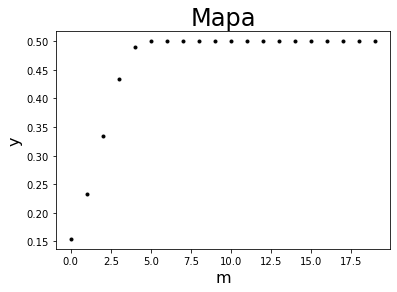

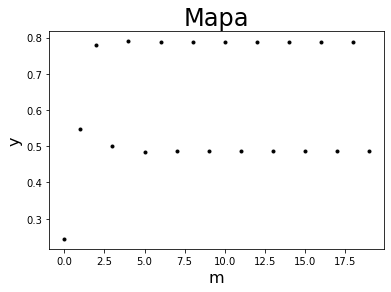

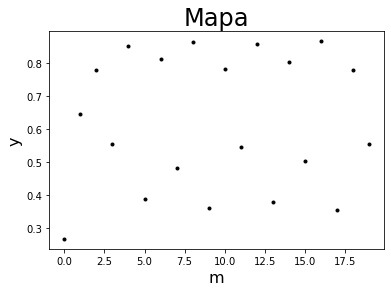

In [3]:
r_values = [0.5, 0.79, 0.865]

for r in r_values:

    X = bifurcacao_diagrama(20, r, 0.1)

    plt.title("Mapa", fontsize=24) 
    plt.xlabel("m", fontsize=16)
    plt.ylabel("y", fontsize=16)
    plt.plot(X, '.k')
    # plt.axis([1.0, 4.0, 0.0, 1.0])
    plt.show()


## 4. Utilizando o algoritmo IFS a seguir, elabore um programa que gere um conjunto de 30.000 iterações para gerar um objeto fractal que se assemelha a uma folha de samambaia na natureza. Inicie o programa em (x1, y1) = (0.5, 0.0). Os valores de (x_n+1, y_n+1) são calculados por:

In [4]:
def fractal_samambaia(x0: float, y0: float, r: float):
    if r<0.02:
        return (0.5, 0.27*y0)
    elif r<=0.17 and r>=0.02:
        return (-0.139*x0+0.263*y0+0.57, 0.246*x0+0.244*y0-0.036)
    elif r<=0.3 and r>0.17:
        return (0.17*x0-0.215*y0+0.408, 0.222*x0+0.176*y0+0.0893)
    elif r>0.3 and r<1:
        return (0.781*x0+0.034*y0+0.1075, -0.032*x0+0.739*y0+0.27)
    else:
        raise ValueError("Valor de r maior que 1")

In [5]:
N = 300000
bmin = 0.019
bmax = 0.99

passo = (bmax - bmin)/N

with open('fractal_samambaia.dat', 'w+') as biflog:
  x = 0.5
  y = 0.0
  for _ in np.arange(bmin, bmax, passo):
    r = random()
    x, y = fractal_samambaia(x, y, r)




    biflog.write("%.2f\t %.2f \t %.2f\n" % (x, y, r))

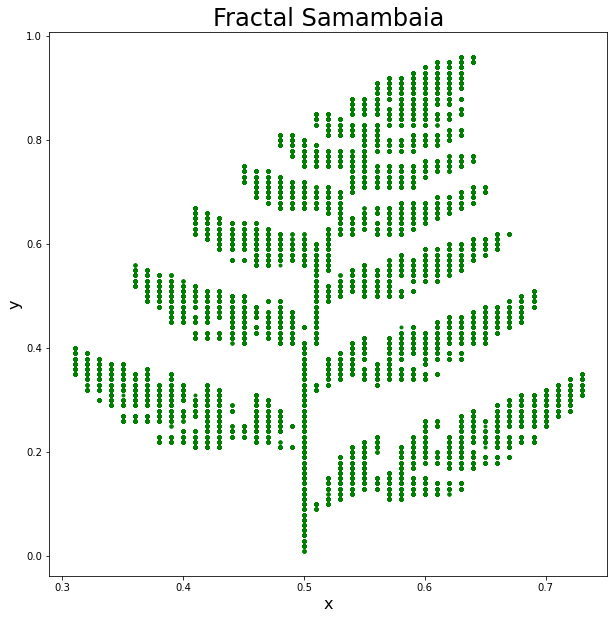

In [6]:
valores = np.loadtxt('fractal_samambaia.dat')

x = []
y = []
r = []
for i in range(len(valores)):
    x.append(valores[i][0])
    y.append(valores[i][1])
    r.append(valores[i][2])


plt.subplots(figsize=(10,10))
plt.title("Fractal Samambaia", fontsize=24) 
plt.xlabel("x", fontsize=16)
plt.ylabel("y", fontsize=16)
plt.plot(x, y, '.g')
# plt.axis([1.0, 4.0, 0.0, 1.0])
plt.show()


## 5.
### Transforme o programa triangulo.c que implementa o fractal de pascal de tal forma que você substitua a estrutura de repetição for e if por uma estrutura do tipo while.

#### Primeira solução

In [5]:
def pascal_fractal(x0: float, y0: float, r: float) -> tuple:
    v1x = 20.0
    v1y = 20.0
    v2x = 320.0
    v2y = 20.0
    v3x = 170.0
    v3y = 280.0
 

    if r<= 0.3333:
        x = 0.5*(x0+v1x)
        y = 0.5*(y0+v1y)

    elif r>0.3333 and r<=0.6666:
        x = 0.5*(x0+v2x)
        y = 0.5*(y0+v2y)
    else:
        x = 0.5*(x0+v3x)
        y = 0.5*(y0+v3y)
    return x,y

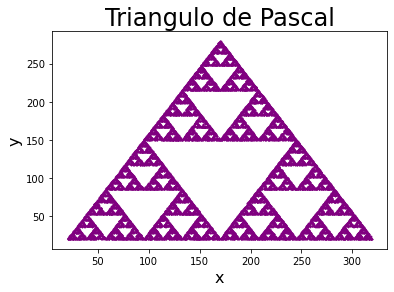

In [8]:
maxit = 30000

v1x = 20.0
v1y = 20.0
v2x = 320.0
v2y = 20.0
v3x = 170.0
v3y = 280.0
x = 180.0
y = 150.0

X = [x]
Y = [y]

plt.title("Triangulo de Pascal", fontsize=24)
plt.xlabel("x", fontsize=16)
plt.ylabel("y", fontsize=16)
m=0
while m<maxit:
    r = random()
    arr = pascal_fractal(X[m], Y[m], r)
    X.append(arr[0])
    Y.append(arr[1])
    
    m += 1

plt.scatter(X, Y, color='purple', s=0.5)

plt.show()

### Segunda solução

In [6]:
def pascal_fractal(x0: float, y0: float, r: float) -> tuple:
    if r<= 0.3333:
        x = 0.5*(x0+v1x)
        y = 0.5*(y0+v1y)

    elif r>0.3333 and r<=0.6666:
        x = 0.5*(x0+v2x)
        y = 0.5*(y0+v2y)
    else:
        x = 0.5*(x0+v3x)
        y = 0.5*(y0+v3y)
    return x,y



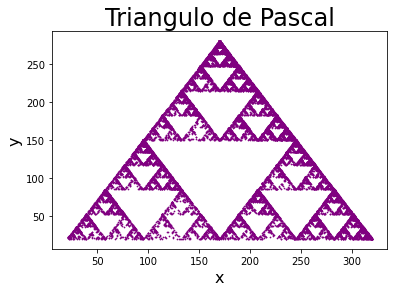

In [10]:
maxit = 30000

v1x = 20.0
v1y = 20.0
v2x = 320.0
v2y = 20.0
v3x = 170.0
v3y = 280.0
x = 180.0
y = 150.0

X = [x]
Y = [y]

plt.title("Triangulo de Pascal", fontsize=24)
plt.xlabel("x", fontsize=16)
plt.ylabel("y", fontsize=16)

m=0

while m<maxit:
    r = random()
    while r<=0.3333:
        x = 0.5*(X[m]+v1x)
        y = 0.5*(Y[m]+v1y)
        X.append(x)
        Y.append(y)
        r = random()
        m += 1

    while r>0.3333 and r<=0.6666:
        x = 0.5*(X[m]+v2x)
        y = 0.5*(Y[m]+v2y)

        X.append(x)
        Y.append(y)
        r = random()
        m += 1

    while r>0.6666:
        x = 0.5*(X[m]+v3x)
        y = 0.5*(Y[m]+v3y)

        X.append(x)
        Y.append(y)
        r = random()
        m += 1

plt.scatter(X, Y, color='purple', s=0.5)

plt.show()

## Q. 6 -
#### Mapa de Hénon é um mapa bidimensional não linear e que possui estrutura fractal. Escreva um programa iterativo para gerar o mapa de Hénon. Considere b = 0.26. 

##### a) Gere quatro gráficos para os seguintes valores de a: i) a = 1.0, ii) a = 1.0293, iii) a = 1.045, iv) a = 1.2. Elimine as 500 iterações iniciais para retirar o transiente. Gere mais 10000 valores ou mais para obter detalhes do gráfico. A figura 3.16 é o gráfico que você deve obter após a implementação do programa.

Mapa de Hénon:
x_n+1 = 1 - a*x^2_n + y_n
y_n+1 = b*x_n


![henon_map](Henon_map.png)

In [11]:
def henon_map(x: float, y: float, a: float, b = 0.26) -> tuple:
    x1 = 1 - a * x ** 2 + y
    y1 = b*x

    return x1, y1

In [12]:
plt.style.use('dark_background')

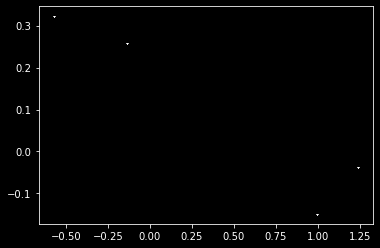

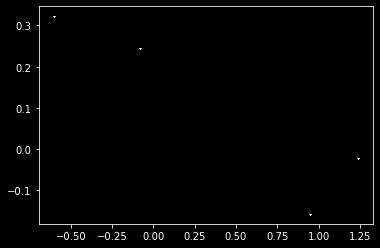

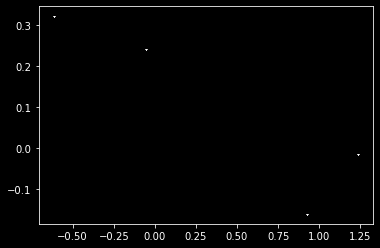

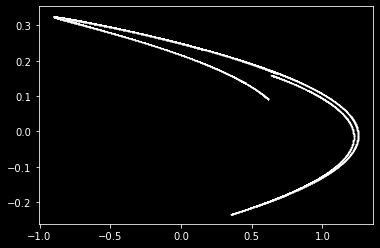

In [13]:
# Para a=1.0


range_run = 4*10500
X = np.zeros(range_run + 1)
Y = np.zeros(range_run + 1)


a_values = [1.0, 1.0293, 1.045, 1.2]
for a in a_values:
    x = 0
    y = 0
    for i in range(range_run):
        x, y = henon_map(X[i], Y[i], a)
        X[i+1] = x
        Y[i+1] = y
    
    # cut_interval = 500 + range_to_start

    # X = X[cut_interval:]
    # Y = Y[cut_interval:]

    # range_to_start += range_run
    plt.plot(X[500:], Y[500:], '^', color='white', alpha=0.8, markersize=0.3)
    plt.show()

#### b) Faça um programa para amplicação de regiões internas deste atrator. Escolha uma região retangular e recalcule o atrator, permitindo a sua amplicação

In [7]:
def henon_map(x: float, y: float, a: float, b = 0.26):
    x1 = 1 - a * x ** 2 + y
    y1 = b*x

    return x1, y1

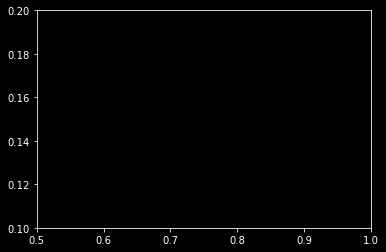

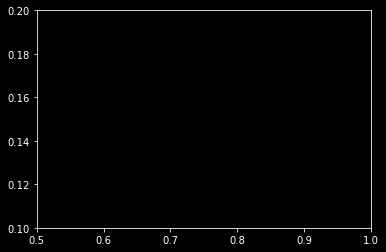

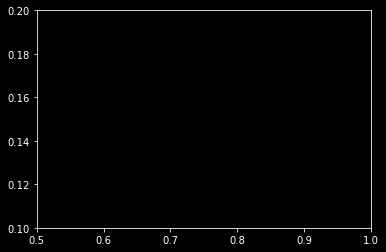

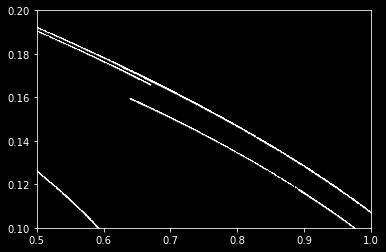

In [15]:
# Para a=1.0
x = 1
y = 2

range_run = 4*10500
X = np.zeros(range_run + 1)
Y = np.zeros(range_run + 1)


a_values = [1.0, 1.0293, 1.045, 1.2]
for a in a_values:
    x = 0
    y = 0
    for i in range(range_run):
        x, y = henon_map(X[i], Y[i], a)
        X[i+1] = x
        Y[i+1] = y
    
    # cut_interval = 500 + range_to_start

    # X = X[cut_interval:]
    # Y = Y[cut_interval:]

    # range_to_start += range_run
    plt.plot(X[500:], Y[500:], '^', color='white', alpha=0.8, markersize=0.3)
    plt.xlim([0.5, 1])
    plt.ylim([0.1, 0.2])
    plt.show()

## Q. 7 -
Floco de neve: um floco de neve é um exemplo de fractal. Ele pode ser implementado a partir da curva de Koch. Essa curva é um fractal que pode ser gerada a partir do seguinte algoritmo. Para se desenhar uma curva de Koch com comprimento x, devemos:

1. Desenhar a curva de Koch com comprimento x/3.
2. Virar 60 graus à esquerda.
3. Desenhar uma curva de Koch com comprimento x/3.
4. Virar 120 graus à direita.
5. Desenhar a curva de Koch com comprimento x/3.
6. Virar 60 graus à esquerda.
7. Desenhar a curva de Koch com comprimento x/3.
8. No caso em que x for menor que 4, desenhe uma reta de comprimento x.

Este algoritmo é implementado em Python da seguinte forma:

In [1]:

def koch(t: turtle.Turtle, n: int) -> None:
    if n < 10:
        t.fd(n)
        return
    m = n/3
    koch(t, m)
    t.lt(60)
    koch(t, m)
    t.rt(120)
    koch(t, m)
    t.lt(60)
    koch(t, m)

bob = turtle.Turtle()
bob.pu()
bob.goto(-150, 90)
bob.pd()
koch(bob, 300)
turtle.mainloop()

In [1]:
def floconeve(t: turtle.Turtle, n: int, levels: int) -> None:
    
    if n < 10:
        t.fd(n)
        return
    m = n/3
    
    floconeve(t, m, levels -1)
    t.lt(60)
    floconeve(t, m, levels -1)
    t.rt(120)
    floconeve(t, m, levels -1)
    t.lt(60)
    floconeve(t, m, levels -1)


bob = turtle.Turtle()
bob.speed(0)
bob.pu()
bob.goto(-150, 90)
bob.pd()
for i in range(3):
    floconeve(bob, 300, 4)
    bob.rt(120)
turtle.mainloop()

## Q. 8 - 
Considere o algoritmo a seguir. Este algoritmo é uma adapação do algoritmo do conjunto de Julia sua implementação computacional gera o conjunto de Mandelbrot onde a função iterativa é dada por: z = z^2 + c, iniciando em z=0 e para cada número complexo c no plano. Considerando agora o círculo de convergência com raio r=2.0. Implemente o programa em Python deste algoritmo. Você deve obter um gŕafico semelhante ao da figura 3.18 a seguir.


![mandelbrot](mandelbrot.png)

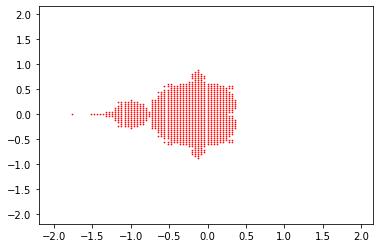

In [2]:
xmin = -2.0
xmax = 2.0
ymin = -2.0
ymax = 2.0

maxint = 100

z = 0

r_conv = 2

dx = (xmax - xmin)/maxint
dy = (ymax - ymin)/maxint



for x in np.arange(xmin, xmax, dx):
    for y in np.arange(ymin, ymax, dy):
        c = complex(x, y)
        w = z
        if abs(w) > r_conv:
            plt.scatter(x, y, color='red', s=0.5)
        else:
            for cont in range(1, maxint):
                w = w*w + c
                if abs(w) > r_conv:
                    plt.scatter(x, y, color='white', s=0.5)
                    break
        if abs(w) <= r_conv:
            plt.scatter(x, y, color='red', s=0.5)

plt.show()
            

